In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
master = pd.read_csv("data/Master.csv")
batting = pd.read_csv("data/Batting.csv")
salaries = pd.read_csv("data/Salaries.csv")
positions = pd.read_csv("data/Appearances.csv")
pitching = pd.read_csv("data/Pitching.csv")

In [4]:
part_master = master[["playerID", "nameFirst", "nameLast"]]
part_batting = batting[["playerID", "yearID", "teamID", "lgID", "G", "AB", "H", "BB", "HBP", "SF"]]
part_salaries = salaries[["playerID", "yearID", "teamID", "salary"]]
part_positions = positions[["playerID", "yearID", "teamID", "GS", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of", "G_dh"]]
part_pitching = pitching[["playerID", "yearID", "teamID", "W", "L", "GS", "ERA"]]

In [5]:
batting_2004 = part_batting[part_batting["yearID"] == 2004]
salaries_2004 = part_salaries[part_salaries["yearID"] == 2004]
positions_2004 = part_positions[part_positions["yearID"] == 2004]
pitching_2004 = part_pitching[part_pitching["yearID"] == 2004]

In [6]:
battpitch_2004 = pd.merge(batting_2004, pitching_2004, how="outer", on=("playerID", "teamID"))

In [7]:
battpitchpos_2004 = pd.merge(battpitch_2004, positions_2004, how="outer", on=("playerID", "teamID"))

In [8]:
battpitchpossal_2004 = pd.merge(battpitchpos_2004, salaries_2004, how="outer", on=("playerID", "teamID"))

In [10]:
mlb_2004 = pd.merge(battpitchpossal_2004, part_master, how="inner", on="playerID")

In [14]:
mlb_2004["OBP"] = (mlb_2004.H + mlb_2004.BB + mlb_2004.HBP) / (mlb_2004.AB + mlb_2004.BB + mlb_2004.HBP + mlb_2004.SF)

In [198]:
mlb_2004 = mlb_2004[mlb_2004["OBP"]]

TypeError: 'method' object is not subscriptable

In [191]:
OBP_2004 = mlb_2004.OBP

In [192]:
OBP_2004.head(20)

0          NaN
1          NaN
2     0.181818
3     0.427770
4     0.106383
5          NaN
6     0.358974
7          NaN
8          NaN
9          NaN
10         NaN
11    0.255319
12         NaN
13    0.272727
14    0.181818
15    0.000000
16    0.350174
17    0.262295
18         NaN
19         NaN
Name: OBP, dtype: float64

In [196]:
avg_obp_2004 = OBP_2004.mean()

In [197]:
avg_obp_2004

0.24657077971166202

In [21]:
stdev_obp_2004 = OBP_2004.std()

In [24]:
mlb_2004["OBP_std"] = (mlb_2004.OBP - avg_obp_2004) / stdev_obp_2004

In [45]:
avg_sal_2004 = mlb_2004.salary.mean()
stdev_sal_2004 = mlb_2004.salary.std()

In [70]:
avg_sal_2004

2489998.6775000002

In [46]:
mlb_2004["salary_std"] = (mlb_2004.salary - avg_sal_2004) / stdev_sal_2004

In [47]:
mlb_2004["OBP_Sal"] = mlb_2004.OBP_std - mlb_2004.salary_std

In [102]:
mlb_2004.sort("OBP_Sal", ascending=False).head(10)

,playerID,yearID_x,teamID,lgID,G,AB,H,BB,HBP,SF,...,G_of,G_dh,yearID_y,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
258,cottsne01,2004,CHA,AL,56,1,1,0,0,0,...,0,0,2004,301000,Neal,Cotts,1.000000,5.033774,-0.619846,5.653620
146,broweji01,2004,SFN,NL,89,2,1,1,0,0,...,0,0,2004,662500,Jim,Brower,0.666667,2.806724,-0.517482,3.324206
352,eischjo01,2004,MON,NL,22,3,2,0,0,0,...,0,0,2004,1300000,Joey,Eischen,0.666667,2.806724,-0.336965,3.143689
1207,torcato01,2004,SFN,NL,13,9,5,1,1,1,...,0,0,2004,302000,Tony,Torcato,0.583333,2.249961,-0.619563,2.869524
97,bentzch01,2004,MON,NL,36,2,1,0,0,0,...,0,0,2004,300000,Chad,Bentz,0.500000,1.693199,-0.620129,2.313328
675,knottga01,2004,DET,AL,36,3,1,1,0,0,...,0,0,2004,316000,Gary,Knotts,0.500000,1.693199,-0.615599,2.308797
34,ankieri01,2004,SLN,NL,5,1,0,1,0,0,...,0,0,2004,320000,Rick,Ankiel,0.500000,1.693199,-0.614466,2.307665
922,olmedra01,2004,CIN,NL,8,1,0,1,0,0,...,0,0,2004,322000,Ray,Olmedo,0.500000,1.693199,-0.613900,2.307098
457,gipsoch01,2004,TBA,AL,5,4,2,0,0,0,...,2,0,2004,350000,Charles,Gipson,0.500000,1.693199,-0.605971,2.299170
1131,simonja01,2004,SLN,NL,15,2,1,0,0,0,...,1,0,2004,350000,Jason,Simontacchi,0.500000,1.693199,-0.605971,2.299170


At this point, I have a nice dataframe called mlb_2004 that has batting, pitching, appearance, and salary stats from the 2004 MLB season. I've also added in: OBP (on base percentage), OBP_std (how many standard deviations above or below the mean OBP that player is), salary_std (how many standard deviations above or below the mean salary that player is), OBP_Sal (OBP_std minus salary_std).

This last number can help compare players based on their OBP relative to the average along with their salary relative to the average.

In [50]:
mlb_2004_pitchers = mlb_2004[mlb_2004["G_p"] > 0]

In [77]:
mlb_2004_pitchers = mlb_2004_pitchers[mlb_2004_pitchers.OBP.notnull()]

In [105]:
mlb_2014_pitchers[mlb_2014_pitchers["lgID"] == "NL"].sort("W", ascending=False).head(20)

,playerID,yearID_x,teamID,lgID,G,AB,H,BB,HBP,SF,...,G_of,G_dh,yearID_y,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
933,oswalro01,2004,HOU,NL,36,71,10,3,1,1,...,0,0,2004,3250000,Roy,Oswalt,0.184211,-0.416638,0.215205,-0.631843
949,pavanca01,2004,FLO,NL,31,68,13,1,1,0,...,0,0,2004,3800000,Carl,Pavano,0.214286,-0.215701,0.370945,-0.586647
233,clemero02,2004,HOU,NL,33,72,12,3,0,0,...,0,0,2004,5000000,Roger,Clemens,0.200000,-0.311146,0.710742,-1.021889
1109,schmija01,2004,SFN,NL,32,66,9,4,1,0,...,0,0,2004,7937500,Jason,Schmidt,0.197183,-0.329967,1.542537,-1.872504
1172,suppaje01,2004,SLN,NL,31,57,4,1,0,0,...,0,0,2004,1000000,Jeff,Suppan,0.086207,-1.071415,-0.421914,-0.649501
1339,zambrca01,2004,CHN,NL,31,70,16,3,0,1,...,0,0,2004,450000,Carlos,Zambrano,0.256757,0.068054,-0.577655,0.645709
768,maddugr01,2004,CHN,NL,34,69,11,1,0,0,...,0,0,2004,6000000,Greg,Maddux,0.171429,-0.502036,0.993907,-1.495943
639,johnsra05,2004,ARI,NL,35,80,10,4,0,0,...,0,0,2004,16000000,Randy,Johnson,0.166667,-0.533851,3.825548,-4.359400
700,lawrebr02,2004,SDN,NL,36,62,6,3,0,0,...,0,0,2004,925000,Brian,Lawrence,0.138462,-0.722294,-0.443152,-0.279143
780,marquja01,2004,SLN,NL,35,72,21,1,0,1,...,0,0,2004,525000,Jason,Marquis,0.297297,0.338911,-0.556417,0.895329


Johan Santana from Minnesota is a good candidate for starting pitcher. His record in 2004 was 20-6, with a 2.61 ERA, so he's an excellent pitcher. But he's also a decent hitter. His OBP that year was .375, which is not quite 1 full standard deviation above the mean (0.858 to be exact), and his salary was just below the mean (1.6 million to the avg of 2.5 million). So his OBP_Sal is 1.11, which is much better than any of the other pitchers around him based on total wins. Unfortunately, he's an AL pitcher, so he only had 8 ABs, which means his OBP might be an anomoly. So we'll restrict this to NL pitchers, for the sake of accuracy on OBP. With that restriction, the best pitcher is either Carlos Zambrano of the Cubs (16-8, 2.75 ERA, .257 OBP, Salary 450,000, 70 ABs, .646 OBP_Sal) or Jason Marquis of the Cardinals (15-7, 3.71 ERA, .297 OBP, Salary 525,000, 72 ABs, .895 OBP_Sal). Since this homework is supposed to focus on OBP, and since I'm a Cardinals fan, I'll go with Marquis on this one.

In [107]:
mlb_2004_catch = mlb_2004[mlb_2004["G_c"] > 0].sort("OBP_Sal", ascending=False)

In [109]:
mlb_2004_catch = mlb_2004_catch[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_c", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [111]:
mlb_2004_catch.head(10)

,playerID,teamID,lgID,G,AB,H,BB,G_c,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
60,bardjo01,CLE,AL,7,19,8,3,7,316700,Josh,Bard,0.478261,1.547956,-0.615400,2.163357
372,estrajo01,ATL,NL,134,462,145,39,133,312500,Johnny,Estrada,0.377907,0.877477,-0.616590,1.494066
1166,stinnke01,KCA,AL,20,59,18,5,20,500000,Kelly,Stinnett,0.378788,0.883362,-0.563496,1.446859
804,mauerjo01,MIN,AL,35,107,33,11,32,300000,Joe,Mauer,0.368852,0.816982,-0.620129,1.437111
793,martivi01,CLE,AL,141,520,147,60,132,304500,Victor,Martinez,0.358714,0.749246,-0.618855,1.368101
849,mirabdo01,BOS,AL,59,160,45,19,53,825000,Doug,Mirabelli,0.368132,0.812168,-0.471468,1.283636
617,ingebr01,DET,AL,131,408,117,32,39,340000,Brandon,Inge,0.340000,0.624215,-0.608803,1.233017
998,prattto02,PHI,NL,45,128,33,18,43,875000,Todd,Pratt,0.351351,0.700055,-0.457310,1.157365
1110,schnebr01,MON,NL,135,436,112,42,133,350000,Brian,Schneider,0.325052,0.524343,-0.605971,1.130314
915,ojedami01,SDN,NL,62,156,40,15,50,305000,Miguel,Ojeda,0.321839,0.502879,-0.618713,1.121592


At catcher, I'm going to take Johnny Estrada of the Braves, with an OBP of .378, a salary of 312,500, and an OBP_Sal of 1.494 over 462 ABs. (For the sake of space, all of the following position player dataframes will only be displayed to 5 or 10 rows instead of 20.)

In [112]:
mlb_2004_firstb = mlb_2004[mlb_2004["G_1b"] > 0].sort("OBP_Sal", ascending=False)

In [113]:
mlb_2004_firstb = mlb_2004_firstb[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_1b", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [118]:
mlb_2004_firstb.head()

,playerID,teamID,lgID,G,AB,H,BB,G_1b,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
526,hafnetr01,CLE,AL,140,482,150,68,11,316300,Travis,Hafner,0.410122,1.092711,-0.615514,1.708225
541,hanseda01,SEA,AL,57,78,22,18,7,750000,Dave,Hansen,0.412371,1.107737,-0.492705,1.600442
219,choihe01,FLO,NL,95,281,76,52,89,310000,Hee-Seop,Choi,0.387574,0.942063,-0.617297,1.559361
935,overbly01,MIL,NL,159,579,174,81,158,326000,Lyle,Overbay,0.384731,0.923066,-0.612767,1.535833
339,dunnad01,CIN,NL,161,568,151,108,10,445000,Adam,Dunn,0.387665,0.942673,-0.579070,1.521743


Lyle Overbay of Milwaukee gets the nod at first base, since the players above him based on OBP_Sal didn't play enough games at that position (I'm using 100 games at the position as a minimum). Overbay had an OBP of .385 and a salary of only 326,000 for an OBP_Sal of 1.536.

In [119]:
mlb_2004_secb = mlb_2004[mlb_2004["G_2b"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_secb = mlb_2004_secb[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_2b", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [123]:
mlb_2004_secb.head()

,playerID,teamID,lgID,G,AB,H,BB,G_2b,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
195,carroja01,MON,NL,102,218,63,32,51,310000,Jamey,Carroll,0.377953,0.877783,-0.617297,1.495080
420,freelry01,CIN,NL,143,505,140,67,15,320000,Ryan,Freel,0.375000,0.858055,-0.614466,1.472521
452,gilesma01,ATL,NL,102,379,118,36,97,430000,Marcus,Giles,0.378190,0.879370,-0.583318,1.462687
82,bellhma01,BOS,AL,138,523,138,88,124,490000,Mark,Bellhorn,0.373183,0.845912,-0.566328,1.412240
912,offerjo01,MIN,AL,77,172,44,29,3,500000,Jose,Offerman,0.363184,0.779111,-0.563496,1.342607


My choice for second base is Mark Bellhorn from Boston (1.41 OBP_Sal, .373 OPB, 490,000 Salary). For comparison, the OBP leader at second base for 2004 had an OBP of .391 but a salary of 2.5 million. So Bellhorn is a steal.

In [124]:
mlb_2004_ss = mlb_2004[mlb_2004["G_ss"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_ss = mlb_2004_ss[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_ss", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [131]:
mlb_2004_ss.head(10)

,playerID,teamID,lgID,G,AB,H,BB,G_ss,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
922,olmedra01,CIN,NL,8,1,0,1,7,322000,Ray,Olmedo,0.500000,1.693199,-0.613900,2.307098
457,gipsoch01,TBA,AL,5,4,2,0,2,350000,Charles,Gipson,0.500000,1.693199,-0.605971,2.299170
764,machaan01,CIN,NL,17,56,15,10,17,300000,Anderson,Machado,0.378788,0.883362,-0.620129,1.503491
195,carroja01,MON,NL,102,218,63,32,10,310000,Jamey,Carroll,0.377953,0.877783,-0.617297,1.495080
82,bellhma01,BOS,AL,138,523,138,88,1,490000,Mark,Bellhorn,0.373183,0.845912,-0.566328,1.412240
389,figgich01,ANA,AL,148,577,171,49,13,320000,Chone,Figgins,0.350318,0.693154,-0.614466,1.307620
495,greenkh01,SDN,NL,139,484,132,53,136,300500,Khalil,Greene,0.349005,0.684381,-0.619988,1.304369
1335,younger01,TEX,AL,104,344,99,43,8,1000000,Eric,Young,0.376884,0.870645,-0.421914,1.292559
1338,youngmi02,TEX,AL,160,690,216,44,158,450000,Michael,Young,0.353180,0.712272,-0.577655,1.289927
1007,puntoni01,MIN,AL,38,91,23,12,11,307500,Nick,Punto,0.339806,0.622917,-0.618005,1.240923


Had to go down the list to number 7 before finding a SS who played more than 100 games at the position. Khalil Greene from the Padres will be making the start for my 2004 Moneyball team at SS, with a .349 OBP, Salary of 300,500, and an OBP_Sal of 1.304. The top OBP for a SS that year was .379, but his salary was 2.5 million.

In [127]:
mlb_2004_thirdb = mlb_2004[mlb_2004["G_3b"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_thirdb = mlb_2004_thirdb[["playerID", "teamID", "lgID", "G", "AB", "H", "BB", "G_3b", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [132]:
mlb_2004_thirdb.head(10)

,playerID,teamID,lgID,G,AB,H,BB,G_3b,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
541,hanseda01,SEA,AL,57,78,22,18,6,750000,Dave,Hansen,0.412371,1.107737,-0.492705,1.600442
195,carroja01,MON,NL,102,218,63,32,13,310000,Jamey,Carroll,0.377953,0.877783,-0.617297,1.495080
420,freelry01,CIN,NL,143,505,140,67,56,320000,Ryan,Freel,0.375000,0.858055,-0.614466,1.472521
82,bellhma01,BOS,AL,138,523,138,88,16,490000,Mark,Bellhorn,0.373183,0.845912,-0.566328,1.412240
693,lambmi01,HOU,NL,112,278,80,31,57,352000,Mike,Lamb,0.355769,0.729571,-0.605405,1.334976
586,hillbo01,PIT,NL,126,233,62,20,25,315000,Bobby,Hill,0.353383,0.713632,-0.615882,1.329513
112,blakeca01,CLE,AL,152,587,159,68,152,352400,Casey,Blake,0.353823,0.716569,-0.605291,1.321860
389,figgich01,ANA,AL,148,577,171,49,92,320000,Chone,Figgins,0.350318,0.693154,-0.614466,1.307620
1335,younger01,TEX,AL,104,344,99,43,1,1000000,Eric,Young,0.376884,0.870645,-0.421914,1.292559
169,burrose01,SDN,NL,130,523,156,31,125,340000,Sean,Burroughs,0.348135,0.678566,-0.608803,1.287368


Casey Blake of Cleveland will be playing third base (1.322 OBP_Sal, .354 OBP, 352,400 Salary). There is a little bigger gap here than at second base when looking at the bargains compared to the leaders. The top OBP for a regular third baseman (more than 100 games at the position) was .419 that year (Melvin Mora, who made 2.3 million that year).

In [147]:
mlb_2004_of = mlb_2004[mlb_2004["G_of"] > 0].sort("OBP_Sal", ascending=False)
mlb_2004_of = mlb_2004_of[["playerID", "teamID", "G", "AB", "G_lf", "G_cf", "G_rf", "G_of", "salary", "nameFirst", "nameLast", "OBP", "OBP_std", "salary_std", "OBP_Sal"]]

In [155]:
mlb_2004_of.head(20)

,playerID,teamID,G,AB,G_lf,G_cf,G_rf,G_of,salary,nameFirst,nameLast,OBP,OBP_std,salary_std,OBP_Sal
457,gipsoch01,TBA,5,4,1,2,0,2,350000,Charles,Gipson,0.500000,1.693199,-0.605971,2.299170
1131,simonja01,SLN,15,2,1,0,0,1,350000,Jason,Simontacchi,0.500000,1.693199,-0.605971,2.299170
852,mohrdu01,SFN,117,263,43,6,55,95,342500,Dustan,Mohr,0.393750,0.983327,-0.608095,1.591421
226,clarkbr02,MIL,138,353,3,9,123,133,376000,Brady,Clark,0.385167,0.925985,-0.598609,1.524594
339,dunnad01,CIN,161,568,156,0,0,156,445000,Adam,Dunn,0.387665,0.942673,-0.579070,1.521743
195,carroja01,MON,102,218,2,0,0,2,310000,Jamey,Carroll,0.377953,0.877783,-0.617297,1.495080
462,gloadro01,CHA,110,234,17,1,22,39,302000,Ross,Gload,0.374517,0.854830,-0.619563,1.474393
420,freelry01,CIN,143,505,12,42,46,89,320000,Ryan,Freel,0.375000,0.858055,-0.614466,1.472521
1177,sweenma01,COL,122,177,9,0,20,28,400000,Mark,Sweeney,0.376744,0.869708,-0.591813,1.461521
1293,wilkebr01,MON,160,572,59,18,10,80,375000,Brad,Wilkerson,0.373723,0.849521,-0.598892,1.448412


For the outfield, I'm picking the three players who played at least 100 games in the OF, and preferably had a majority of their games at one particular position (though OFers often can switch positions). At LF, Adam Dunn of Cincinnati fits the bill (156 games at LF, .388 OBP, Salary 445,000, 1.522 OBP_Sal). At CF, Aaron Rowand of the White Sox (126 games there, .361 OBP, Salary 340,000, 1.374 OBP_Sal). At RF, Brady Clark from Milwaukee (123 games, .385 OBP, Salary 376,000, 1.525 OBP_Sal). For comparison, the top 3 OFers by OBP were Barry Bonds (SF, with a ridiculous .609 OBP over 147 games, but an equally ridiculous salary of 18 million), Lance Berkman (HOU, .450 OBP, 6.5 million salary), and J.D. Drew (ATL, .436 OBP, 4.2 million salary). Since none of those three were a CFer (Berkman played there twice, Drew 8 times), we'll include Jim Edmonds (StL, .418 OBP, 9.3 million salary). We can see here the pretty big difference between those who are making under 500,000 and those who are making well above the league average of 2.5 million (or in the case of Bonds, well, well, well above it).

In [179]:
pitcher = {"name": "Jason Marquis (P) StL", "OBP": .297, "Salary": 525000}
catcher = {"name": "Johnny Estrada (C) ATL", "OBP": .378, "Salary": 312500}
first_base = {"name": "Lyle Overbay (1B) MIL", "OBP": .385, "Salary": 326000}
sec_base = {"name": "Mark Bellhorn (2B) BOS", "OBP": .373, "Salary": 490000}
ss = {"name": "Khalil Greene (SS) SD", "OBP": .349, "Salary": 300500}
third_base = {"name": "Casey Blake (3B) CLE", "OBP": .354, "Salary": 352400}
lf = {"name": "Adam Dunn (LF) CIN", "OBP": .388, "Salary": 445000}
cf = {"name": "Aaron Rowand (CF) CHW", "OBP": .361, "Salary": 340000}
rf = {"name": "Brady Clark (RF) MIL", "OBP": .385, "Salary": 376000}

In [186]:
moneyball_team = pd.DataFrame([pitcher, catcher, first_base, sec_base, ss, third_base, lf, cf, rf]).set_index(["name"])

In [187]:
moneyball_team

,OBP,Salary
name,,
Jason Marquis (P) StL,0.297,525000
Johnny Estrada (C) ATL,0.378,312500
Lyle Overbay (1B) MIL,0.385,326000
Mark Bellhorn (2B) BOS,0.373,490000
Khalil Greene (SS) SD,0.349,300500
Casey Blake (3B) CLE,0.354,352400
Adam Dunn (LF) CIN,0.388,445000
Aaron Rowand (CF) CHW,0.361,340000
Brady Clark (RF) MIL,0.385,376000


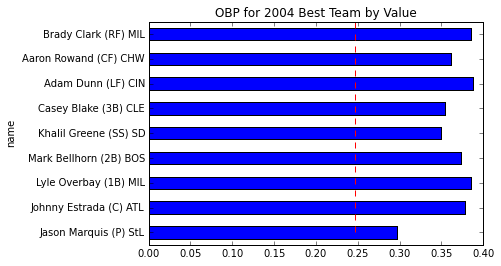

In [189]:
moneyball_team.OBP.plot(kind="barh", title="OBP for 2004 Best Team by Value")
plt.vlines(avg_obp_2004, ymin=0, ymax=100, color="red", linestyle="dashed", label="Avg OBP for MLB 2004")
plt.show()

In [ ]:
all_time_team_frame.plot(x='Player', y="Inflated Salary", kind="barh", figsize=(10, 5), legend=True, title="My Team Inflated Salary by Player vs. Average MLB Player Salary in 2014")
plt.vlines(avg_obp_2004, ymin=0, ymax=100,color="red", linestyle="dashed", label="Average Player Salary 2014")
plt.legend(bbox_to_anchor=(0, -0.05))
plt.show()